# Capstone 2: Modeling

This notebook will examine multiple models for regression problems to estimate CT real estate sales prices

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


In [2]:
X_train = pd.read_csv('C:/Users/kyu_k/OneDrive/Desktop/ds/Spring board DS Career track/Capstones/Capstonetwo/Untitled Folder/X_train.csv')
X_test = pd.read_csv('C:/Users/kyu_k/OneDrive/Desktop/ds/Spring board DS Career track/Capstones/Capstonetwo/Untitled Folder/X_test.csv')

y_train = pd.read_csv('C:/Users/kyu_k/OneDrive/Desktop/ds/Spring board DS Career track/Capstones/Capstonetwo/Untitled Folder/y_train.csv')
y_test = pd.read_csv('C:/Users/kyu_k/OneDrive/Desktop/ds/Spring board DS Career track/Capstones/Capstonetwo/Untitled Folder/y_test.csv')

In [3]:
##### index = False  on to_csv 

In [4]:
X_train.drop('Unnamed: 0',axis=1,inplace = True)
X_test.drop('Unnamed: 0',axis=1,inplace = True)
y_train.drop('Unnamed: 0',axis=1,inplace = True)
y_test.drop('Unnamed: 0',axis=1,inplace = True)



#### RFECV 

Recursive feature elimination with cross-validation to select the number of features.

class sklearn.feature_selection.RFECV(estimator, *, step=1, min_features_to_select=1, cv=None, scoring=None, verbose=0, n_jobs=None, importance_getter='auto')

In [5]:
from sklearn.feature_selection import RFECV

### fit train then transform both test train 


## Linear Modeling

### 1) OLS
--------------------------------------------------------------

#### A) Default OLS

In [80]:
from sklearn.linear_model import LinearRegression

OLS = LinearRegression()
OLS.fit(X_train,y_train)

y_pred = OLS.predict(X_test)

R2_train = OLS.score(X_train,y_train)
R2_test  = OLS.score(X_test,y_test)

MAE = mean_absolute_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared = False)

print('r2_train: ',R2_train, 'r2_test: ',R2_test)
print('MAE: ', MAE, 'RMSE: ',RMSE)

r2_train:  0.7133651596407524 r2_test:  0.7170250176927861
MAE:  71475.41675794085 RMSE:  130398.06360745899


In [81]:
cv_scores = cross_val_score(OLS, X_train, y_train, cv = 5, scoring ='r2')
print(np.mean(cv_scores))
cv_scores = cross_val_score(OLS, X_train, y_train, cv = 5, scoring ='neg_mean_absolute_error')
print(-1*np.mean(cv_scores))
cv_scores = cross_val_score(OLS, X_train, y_train, cv = 5, scoring ='neg_root_mean_squared_error')
print(-1*np.mean(cv_scores))

0.7087750569227421
71525.81108080053
131027.18855622807


#### B)  Feature selection with RFECV

In [104]:
OLS = LinearRegression()
rfecv = RFECV(OLS, scoring = 'neg_root_mean_squared_error')
rfecv.fit(X_train,y_train)
rfe_Xtrain = rfecv.transform(X_train)
rfe_Xtest = rfecv.transform(X_test)

In [105]:
OLS.fit(rfe_Xtrain,y_train)

y_pred = OLS.predict(rfe_Xtest)

R2_train = OLS.score(rfe_Xtrain,y_train)
R2_test  = OLS.score(rfe_Xtest,y_test)

MAE = mean_absolute_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared = False)

print('r2_train: ',R2_train, 'r2_test: ',R2_test)
print('MAE: ', MAE, 'RMSE: ',RMSE)

r2_train:  0.7133651596407524 r2_test:  0.7170250176927861
MAE:  71475.41675794085 RMSE:  130398.06360745899


Optimal number of features : 187


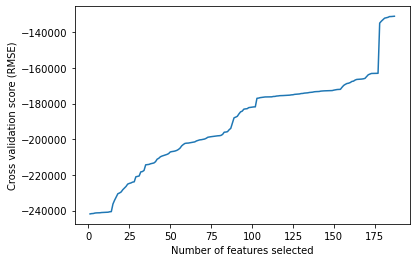

In [106]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (RMSE)")
plt.plot(
    range(1, len(rfecv.grid_scores_) + 1),
    rfecv.grid_scores_,
)
plt.show()

### 2) Elasticnet
---------------------------

In [149]:
from sklearn.linear_model import ElasticNet

ENet = ElasticNet(random_state = 343, tol = .05)
ENet.fit(X_train,y_train)

y_pred = ENet.predict(X_test)

R2 = r2_score(y_test, y_pred)

MAE = mean_absolute_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared = False)

print(R2)
print(MAE,RMSE)

0.43047296919775435
101605.60982525175 184992.57269488214


In [150]:
cv_scores = cross_val_score(ENet, X_train, y_train, cv = 5, scoring ='r2')
print(np.mean(cv_scores))
cv_scores = cross_val_score(ENet, X_train, y_train, cv = 5, scoring ='neg_mean_absolute_error')
print(-1*np.mean(cv_scores))
cv_scores = cross_val_score(ENet, X_train, y_train, cv = 5, scoring ='neg_root_mean_squared_error')
print(-1*np.mean(cv_scores))

0.43011216585344253
101991.16924684682
183276.3381831607


####  B) Feature selection with RFECV

In [151]:
ENet = ElasticNet(random_state = 343, tol =.05)
rfecv = RFECV(ENet, scoring = 'neg_root_mean_squared_error')
rfecv.fit(X_train,y_train)
rfe_Xtrain = rfecv.transform(X_train)
rfe_Xtest = rfecv.transform(X_test)

In [152]:

ENet.fit(rfe_Xtrain, y_train)

y_pred = ENet.predict(rfe_Xtest)

R2 = r2_score(y_test, y_pred)

MAE = mean_absolute_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared = False)

print(R2)
print(MAE,RMSE)

0.43046892146580107
101606.73310286213 184993.23008160538


Optimal number of features : 154


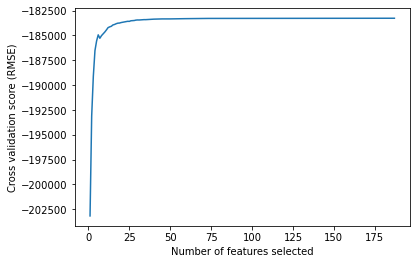

In [153]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (RMSE)")
plt.plot(
    range(1, len(rfecv.grid_scores_) + 1),
    rfecv.grid_scores_,
)
plt.show()

#### C) GridsearchCV/RandomSearchCV

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [155]:


ENet = ElasticNet(random_state = 343, tol = .05)

param_grid = {'alpha': np.linspace(1,100,100),
             'l1_ratio': np.linspace(0,1,50)}

ENetRCV = RandomizedSearchCV(ENet, param_distributions = param_grid, scoring = 'neg_root_mean_squared_error', cv =5)
ENetRCV.fit(rfe_Xtrain, y_train)

print(ENetRCV.best_score_)
print(ENetRCV.best_params_)

y_pred = ENetRCV.predict(rfe_Xtest)

R2 = r2_score(y_test, y_pred)

MAE = mean_absolute_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared = False)

print(R2)
print(MAE,RMSE) 
     


-130928.07201265702
{'l1_ratio': 1.0, 'alpha': 1.0}
0.7169451919977137
71492.89513055014 130416.45460088454


Lasso appears to converge l1 ratio = 1

### 3) LASSO 
-------------------------------------------------------------------------------

In [135]:
from sklearn.linear_model import Lasso

lasso = Lasso(random_state = 343, tol = .05)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

R2 = r2_score(y_test, y_pred)

MAE = mean_absolute_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared = False)

print(R2)
print(MAE,RMSE)


0.7170530906508036
71456.87332468877 130391.59527918104


In [136]:
cv_scores = cross_val_score(lasso, X_train, y_train, cv = 5, scoring ='r2')
print(np.mean(cv_scores))
cv_scores = cross_val_score(lasso, X_train, y_train, cv = 5, scoring ='neg_mean_absolute_error')
print(-1*np.mean(cv_scores))
cv_scores = cross_val_score(lasso, X_train, y_train, cv = 5, scoring ='neg_root_mean_squared_error')
print(-1*np.mean(cv_scores))


0.7088042087474402
71509.64533350134
131020.69722882286


#### B) Feature selection with RFECV

In [132]:
lasso = Lasso(random_state = 343, tol =.05)
rfecv = RFECV(lasso, scoring = 'neg_root_mean_squared_error')
rfecv.fit(X_train,y_train)
rfe_Xtrain = rfecv.transform(X_train)
rfe_Xtest = rfecv.transform(X_test)

In [133]:

lasso.fit(rfe_Xtrain, y_train)

y_pred = lasso.predict(rfe_Xtest)

R2 = r2_score(y_test, y_pred)

MAE = mean_absolute_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared = False)

print(R2)
print(MAE,RMSE)

0.717040895838705
71458.08140501754 130394.40514177087


Optimal number of features : 175


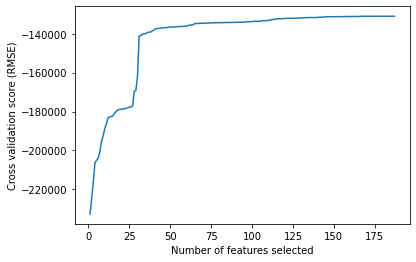

In [134]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (RMSE)")
plt.plot(
    range(1, len(rfecv.grid_scores_) + 1),
    rfecv.grid_scores_,
)
plt.show()

#### C) RandomSearchCV / GridSearchCV

In [141]:
lasso = Lasso(random_state = 343, tol =.05)

param_grid = {'alpha': np.linspace(1,100,100)}

LassoGCV = GridSearchCV(lasso, param_grid = param_grid, scoring = 'neg_root_mean_squared_error', cv =5)
LassoGCV.fit(rfe_Xtrain ,y_train)

print(LassoGCV.best_score_)
print(LassoGCV.best_params_)

y_pred = LassoGCV.predict(rfe_Xtest)

R2 = r2_score(y_test, y_pred)

MAE = mean_absolute_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared = False)

print(R2)
print(MAE,RMSE) 
     

-130985.61144794442
{'alpha': 10.0}
0.7172114027275769
71314.74775357933 130355.11237053841


### 4) Ridge

In [156]:
from sklearn.linear_model import Ridge

ridge = Ridge(random_state = 343, tol = .05)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

R2 = r2_score(y_test, y_pred)

MAE = mean_absolute_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared = False)

print(R2)
print(MAE,RMSE)



0.7170596205067837
71456.38157694992 130390.09068022184


In [157]:
cv_scores = cross_val_score(ridge, X_train, y_train, cv = 5, scoring ='r2')
print(np.mean(cv_scores))
cv_scores = cross_val_score(ridge, X_train, y_train, cv = 5, scoring ='neg_mean_absolute_error')
print(-1*np.mean(cv_scores))
cv_scores = cross_val_score(ridge, X_train, y_train, cv = 5, scoring ='neg_root_mean_squared_error')
print(-1*np.mean(cv_scores))


0.708922018544451
71491.89002196126
130994.38629072928


#### B) Feature selection with RFECV

In [158]:
ridge = Ridge(random_state = 343, tol =.05)
rfecv = RFECV(ridge, scoring = 'neg_root_mean_squared_error')
rfecv.fit(X_train,y_train)
rfe_Xtrain = rfecv.transform(X_train)
rfe_Xtest = rfecv.transform(X_test)

In [159]:

ridge.fit(rfe_Xtrain, y_train)

y_pred = ridge.predict(rfe_Xtest)

R2 = r2_score(y_test, y_pred)

MAE = mean_absolute_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared = False)

print(R2)
print(MAE,RMSE)

0.7170558871591413
71456.68428332865 130390.95091433325


Optimal number of features : 175


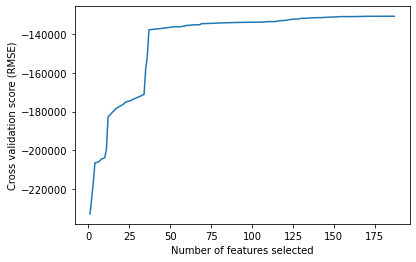

In [160]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (RMSE)")
plt.plot(
    range(1, len(rfecv.grid_scores_) + 1),
    rfecv.grid_scores_,
)
plt.show()

#### C) GridSearchCV/RandomSearchCV

In [162]:
ridge = Ridge(random_state = 343, tol =.05)

param_grid = {'alpha': np.linspace(1,100,100)}

RidgeGCV = GridSearchCV(ridge, param_grid = param_grid, scoring = 'neg_root_mean_squared_error', cv =5)
RidgeGCV.fit(rfe_Xtrain ,y_train)

print(RidgeGCV.best_score_)
print(RidgeGCV.best_params_)

y_pred = RidgeGCV.predict(rfe_Xtest)

R2 = r2_score(y_test, y_pred)

MAE = mean_absolute_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared = False)

print(R2)
print(MAE,RMSE) 

-130942.7177888408
{'alpha': 2.0}
0.7170561363422394
71443.00951046168 130390.89349799768


## Non- linear Models

### 5)Random forest 
------------------------------------------------------

In [55]:
X_trainA = np.array(X_train)
X_testA =np.array(X_test)
y_trainA = np.array(y_train)
y_testA =np.array(y_test)

y_trainA = y_trainA.ravel()
y_testA = y_testA.ravel()

features = X_train.columns


In [56]:
# number of trees, max_depth, min_samples_split and min_samples_leaf (just off the top of my head)

In [57]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state =343,n_jobs =-1)
rf.fit(X_trainA, y_trainA)

y_pred = rf.predict(X_testA)

R2 = r2_score(y_testA, y_pred)

MAE = mean_absolute_error(y_testA, y_pred)
RMSE = mean_squared_error(y_testA, y_pred, squared = False)

print(R2)
print(MAE,RMSE)


0.7499212693878019
63952.21535523913 122584.48296228769


#### B)Feature Selection

In [58]:
from sklearn.feature_selection import SelectFromModel

In [59]:
feat_imp= pd.DataFrame({'importances':rf.feature_importances_},index = features, )
print(feat_imp.sort_values(by = 'importances',ascending = False).head(15))
   

                                           importances
standardized_Sq Ft Est Heated Above Grade     0.326638
County_Fairfield                              0.172926
standardized_Acres                            0.062468
standardized_Sq Ft Total                      0.053421
standardized_Age                              0.045688
City_Greenwich                                0.042263
City_Darien                                   0.036234
standardized_DOM                              0.035902
City_Westport                                 0.029577
standardized_Full Bath                        0.018814
City_New Canaan                               0.016166
standardized_Rooms Total                      0.011554
Garage                                        0.011102
standardized_Beds Total                       0.009568
City_Fairfield                                0.009062


In [60]:
sfm = SelectFromModel(rf, threshold=0.007)
sfm.fit(X_trainA, y_trainA)

SelectFromModel(estimator=RandomForestRegressor(n_jobs=-1, random_state=343),
                threshold=0.007)

In [61]:
for feature_list_index in sfm.get_support(indices=True):
    print(features[feature_list_index])

standardized_Acres
standardized_Sq Ft Total
standardized_Sq Ft Est Heated Above Grade
standardized_DOM
standardized_Age
standardized_Rooms Total
standardized_Beds Total
standardized_Full Bath
standardized_Half Bath
Garage
City_Darien
City_Fairfield
City_Greenwich
City_Madison
City_New Canaan
City_Westport
County_Fairfield


In [62]:
X_train_important = sfm.transform(X_trainA)
X_test_important = sfm.transform(X_testA)

In [63]:
rf_imp = RandomForestRegressor(random_state =343,n_jobs =-1)
rf_imp.fit(X_train_important, y_trainA)

y_pred = rf_imp.predict(X_test_important)

R2 = r2_score(y_testA, y_pred)

MAE = mean_absolute_error(y_testA, y_pred)
RMSE = mean_squared_error(y_testA, y_pred, squared = False)

print(R2)
print(MAE,RMSE)


0.6845030011780786
77957.58276049653 137687.57076167123


#### B)GridSearchCV/RandomSearchCV

In [66]:
rf = RandomForestRegressor(random_state = 343, n_jobs = -1)

param_grid = {'n_estimators': [200,250,300],
              'max_depth':[10, 15, 20]}

RF_Imp_GCV = GridSearchCV(rf, param_grid = param_grid, scoring = 'neg_root_mean_squared_error', cv =3)
RF_Imp_GCV.fit(X_train_important, y_trainA)

print(RF_Imp_GCV.best_score_)
print(RF_Imp_GCV.best_params_)

y_pred = RF_Imp_GCV.predict(X_test_important )

R2 = r2_score(y_testA, y_pred)

MAE = mean_absolute_error(y_testA, y_pred)
RMSE = mean_squared_error(y_testA, y_pred, squared = False)

print(R2)
print(MAE,RMSE) 

-137949.62618186482
{'max_depth': 15, 'n_estimators': 250}
0.6907232022669383
76731.11302655394 136323.52001878942


### 6) Gradient Boosting Model

In [ ]:
X_trainA = np.array(X_train)
X_testA =np.array(X_test)
y_trainA = np.array(y_train)
y_testA =np.array(y_test)

y_trainA = y_trainA.ravel()
y_testA = y_testA.ravel()

features = X_train.columns


In [41]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state =343, learning_rate=.2,n_estimators = 1500)
gb.fit(X_trainA,y_trainA)
y_pred = gb.predict(X_testA)

R2 = r2_score(y_testA, y_pred)

MAE = mean_absolute_error(y_testA, y_pred)
RMSE = mean_squared_error(y_testA, y_pred, squared = False)

print(R2)
print(MAE,RMSE)

0.7564766743229826
62375.253209220085 120967.13769157683


#### B) GridSearchCV/RandomSearchCV

In [42]:
gb = GradientBoostingRegressor(random_state =343, max_features='sqrt')

param_grid = {'learning_rate': [0.2],
                  #'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [ 1500],
                  'max_depth'    : [4,6,8,10]
                 }
GBGCV = GridSearchCV(gb, param_grid = param_grid,scoring = 'neg_root_mean_squared_error', cv =5)
GBGCV.fit(X_trainA, y_trainA)

print(GBGCV.best_score_)
print(GBGCV.best_params_)

y_pred = GBGCV.predict(X_testA)

R2 = r2_score(y_testA, y_pred)

MAE = mean_absolute_error(y_testA, y_pred)
RMSE = mean_squared_error(y_testA, y_pred, squared = False)

print(R2)
print(MAE,RMSE) 

-120567.54950619818
{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 1500}
0.7666881153094623
62069.59817969226 118403.7759542362
